In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()


In [3]:
con = duckdb.connect(database="data/exploitation.db", read_only=True)
df = con.execute("SELECT * FROM houses").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f567d8410b0>>

In [4]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,hospital_type_children,government_hospital,nonprofit_hospital,private_hospital,num_schools,num_students,preschool,elementary_school,middle_school,high_school
0,7051152434,https://portland.craigslist.org/wsc/apa/d/port...,portland,https://portland.craigslist.org,1350.0,apartment,1100.0,2,2.0,Yes,...,1.0,3.0,13.0,2.0,403,240366.0,261.0,64.0,61.0,14.0
1,7051146105,https://portland.craigslist.org/mlt/apa/d/port...,portland,https://portland.craigslist.org,2725.0,apartment,1172.0,2,2.0,Yes,...,1.0,4.0,16.0,2.0,509,309619.0,312.0,81.0,84.0,30.0
2,7051135375,https://portland.craigslist.org/wsc/apa/d/hill...,portland,https://portland.craigslist.org,1630.0,apartment,1030.0,2,2.0,Yes,...,3.0,12.0,48.0,6.0,1431,851145.0,888.0,222.0,237.0,78.0
3,7051134300,https://portland.craigslist.org/clc/apa/d/wils...,portland,https://portland.craigslist.org,1768.0,apartment,1286.0,2,2.5,Yes,...,44.0,88.0,352.0,88.0,13640,8113424.0,8404.0,2288.0,2332.0,528.0
4,7051104814,https://portland.craigslist.org/mlt/apa/d/port...,portland,https://portland.craigslist.org,1384.0,apartment,533.0,0,1.0,Yes,...,6.0,24.0,96.0,12.0,3012,1826880.0,1836.0,480.0,504.0,180.0


In [5]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
id,7.040977e+09,8.804238e+06,7.003808e+09,7.035971e+09,7.043316e+09,7.048427e+09,7.051292e+09,0.0,0.00
price,8.906761e+03,4.485181e+06,1.000000e+00,8.100000e+02,1.040000e+03,1.395000e+03,2.768307e+09,1867.0,0.49
sqfeet,1.059535e+03,1.922083e+04,1.000000e+00,7.500000e+02,9.490000e+02,1.150000e+03,8.388607e+06,736.0,0.19
beds,1.904105e+00,3.503271e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03,0.0,0.00
baths,1.480047e+00,6.175018e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01,0.0,0.00
lat,3.723394e+01,5.546181e+00,-4.353330e+01,3.345570e+01,3.764790e+01,4.113910e+01,1.020360e+02,0.0,0.00
long,-9.270041e+01,1.653239e+01,-1.638940e+02,-1.007750e+02,-8.773820e+01,-8.117960e+01,1.726330e+02,0.0,0.00
num_hospitals,1.603495e+03,2.760014e+03,0.000000e+00,1.040000e+02,6.100000e+02,1.820000e+03,2.633200e+04,0.0,0.00
num_beds,2.711212e+05,5.236006e+05,9.000000e+00,1.565700e+04,9.218800e+04,2.955120e+05,7.407010e+06,525.0,0.14
hospital_type_general,9.559108e+02,1.649668e+03,0.000000e+00,6.200000e+01,3.600000e+02,1.080000e+03,1.634400e+04,0.0,0.00


In [6]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,url,382909,https://zanesville.craigslist.org/apa/d/zanesv...,https://abilene.craigslist.org/apa/d/2-br/7028...,0,0.00
1,region,404,"jacksonville (4242, 1.11)","kansas city (3, 0.0)",0,0.00
2,region_url,413,"https://fredericksburg.craigslist.org (2744, 0...","https://bigbend.craigslist.org (9, 0.0)",0,0.00
3,type,12,"apartment (316613, 82.69)","assisted living (2, 0.0)",0,0.00
4,cats_allowed,2,"Yes (278476, 72.73)","No (104433, 27.27)",0,0.00
5,dogs_allowed,2,"Yes (271138, 70.81)","No (111771, 29.19)",0,0.00
6,smoking_allowed,2,"Yes (280279, 73.2)","No (102630, 26.8)",0,0.00
7,wheelchair_access,2,"No (351426, 91.78)","Yes (31483, 8.22)",0,0.00
8,electric_vehicle_charge,2,"No (377982, 98.71)","Yes (4927, 1.29)",0,0.00
9,comes_furnished,2,"No (364654, 95.23)","Yes (18255, 4.77)",0,0.00


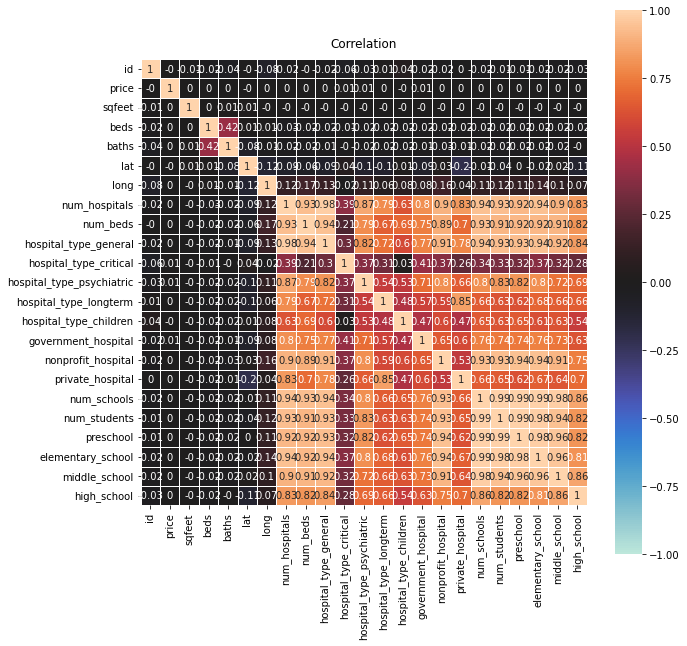

In [7]:
correlation(df)

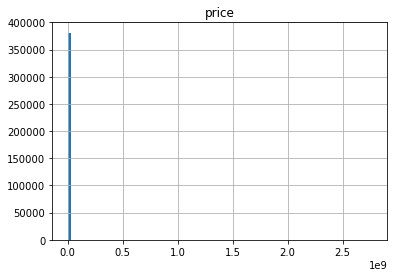

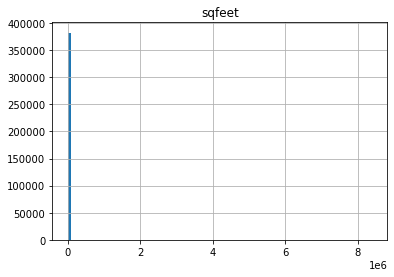

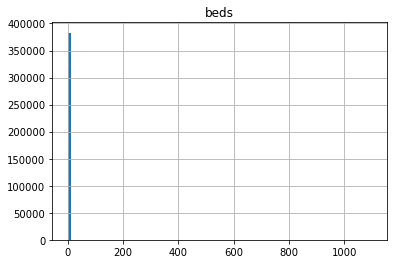

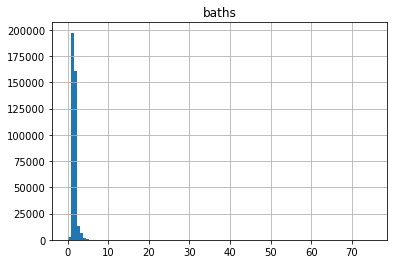

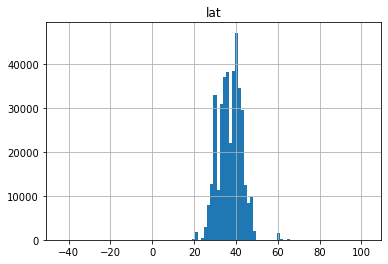

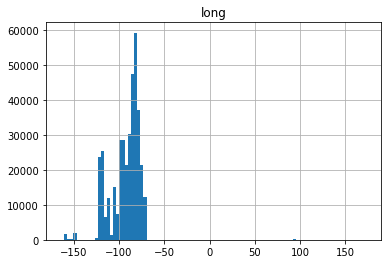

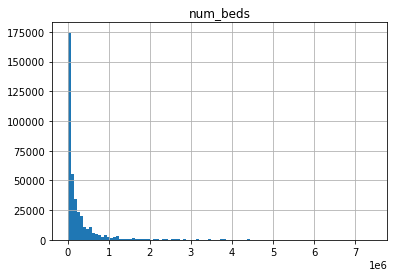

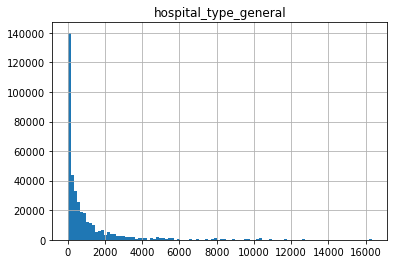

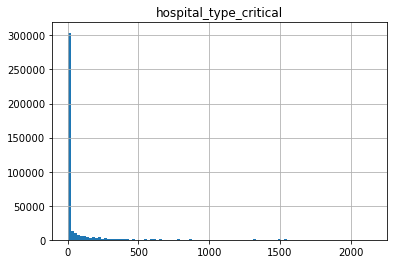

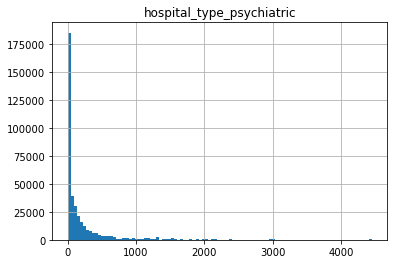

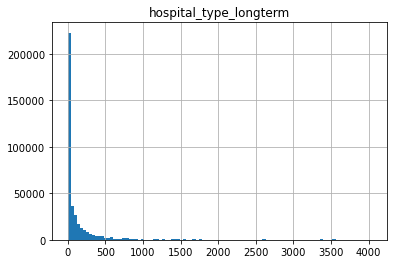

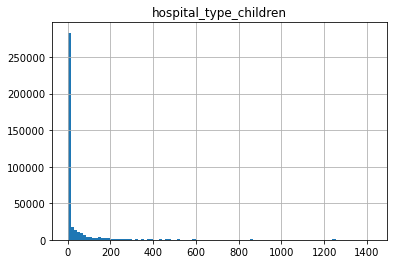

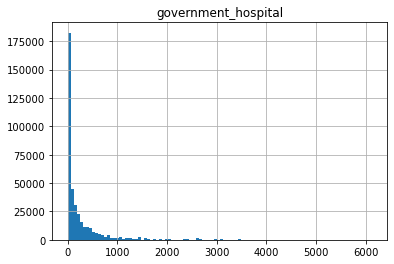

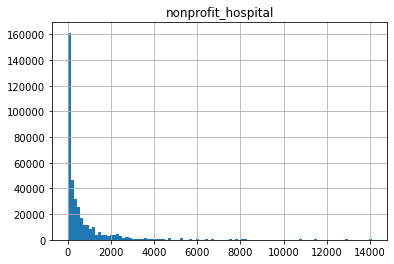

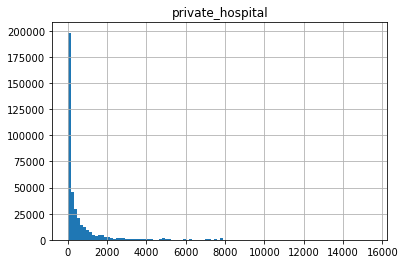

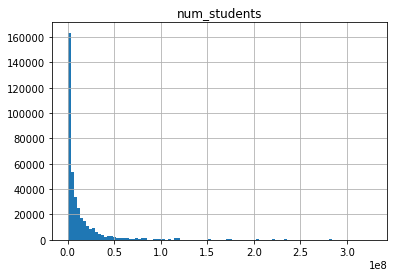

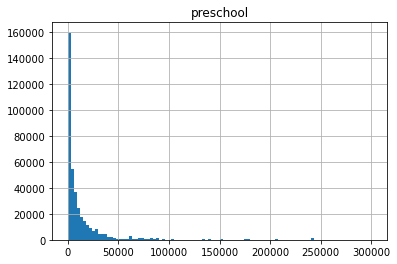

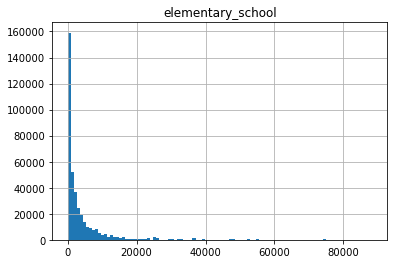

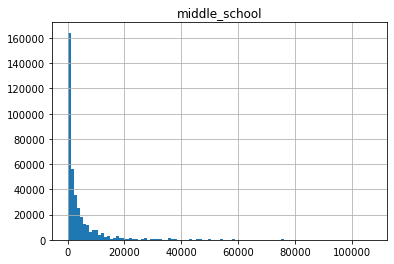

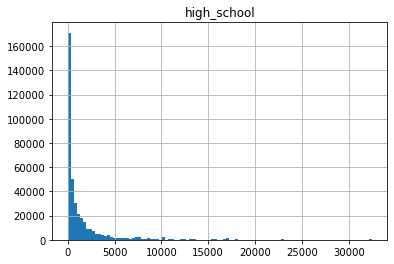

In [8]:
hist(df, bins=100)

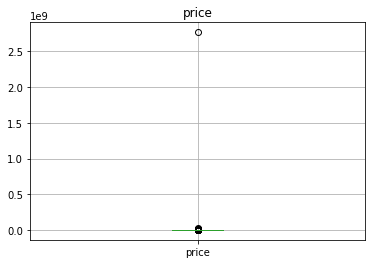

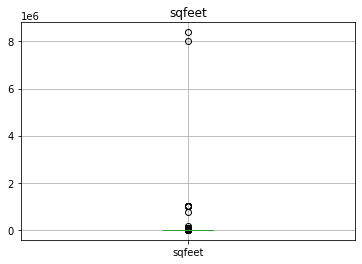

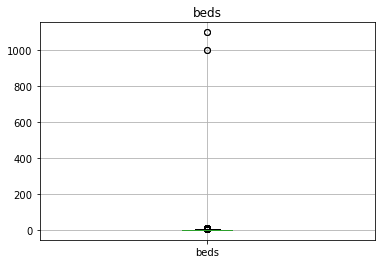

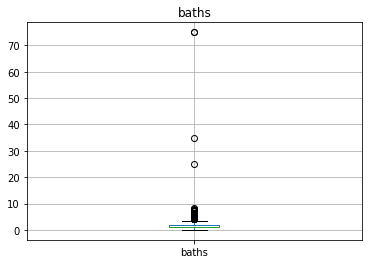

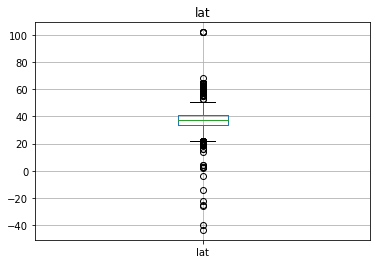

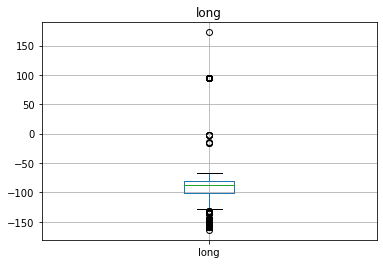

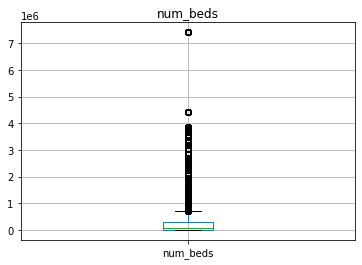

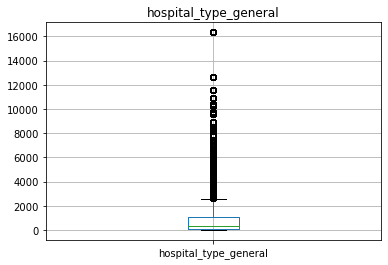

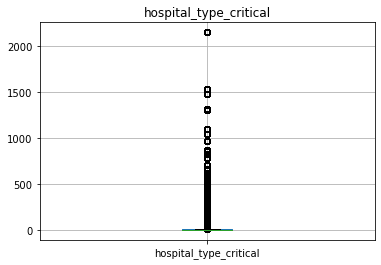

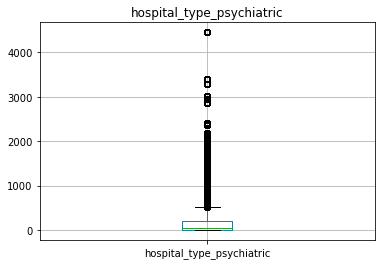

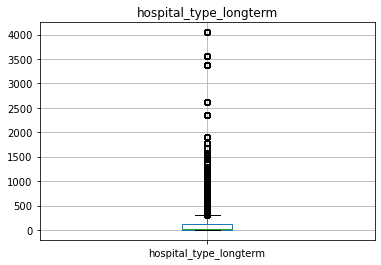

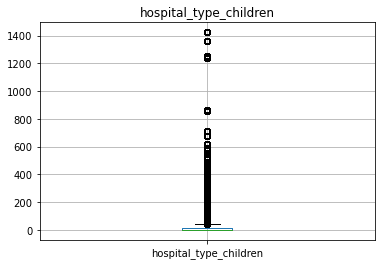

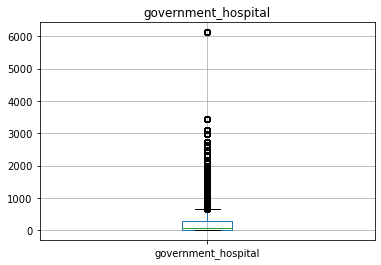

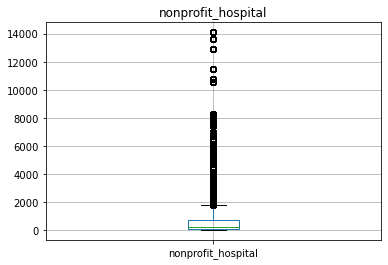

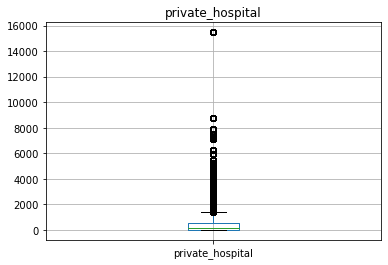

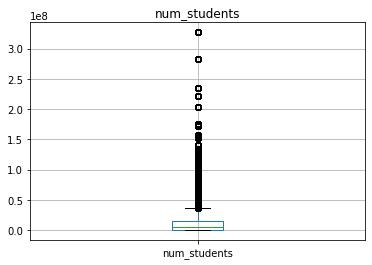

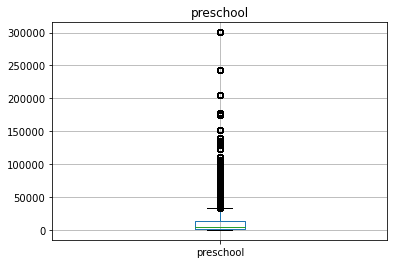

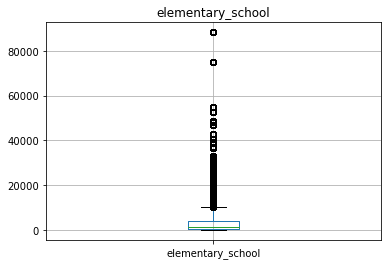

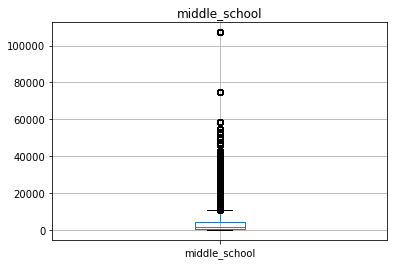

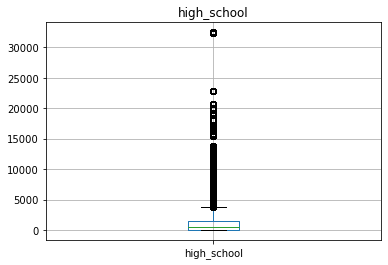

In [9]:
boxplot(df)

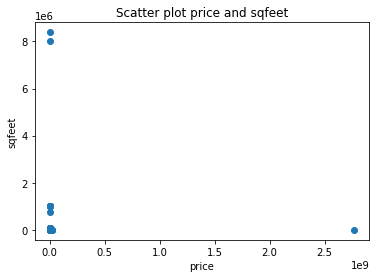

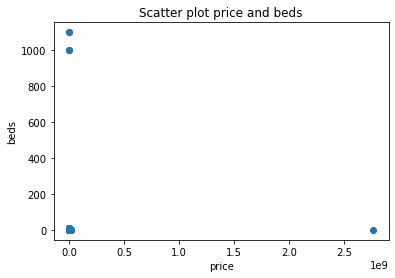

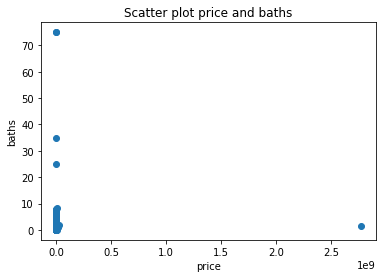

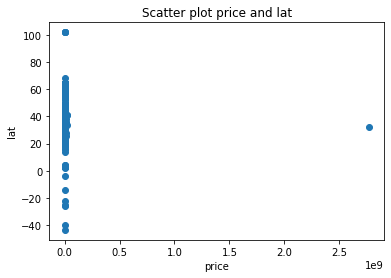

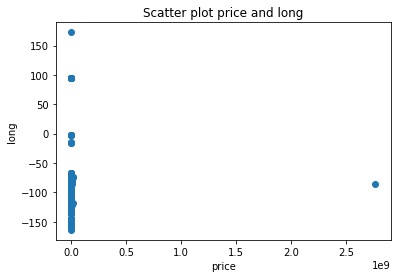

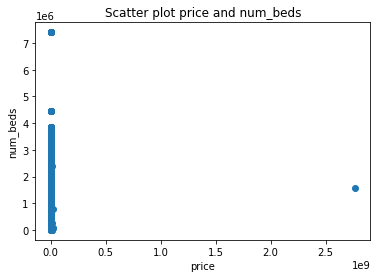

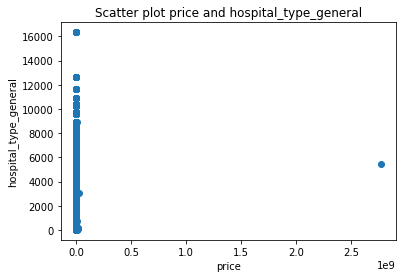

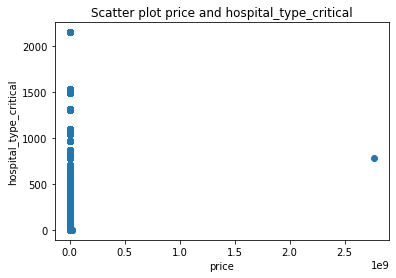

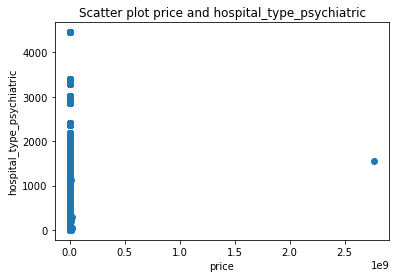

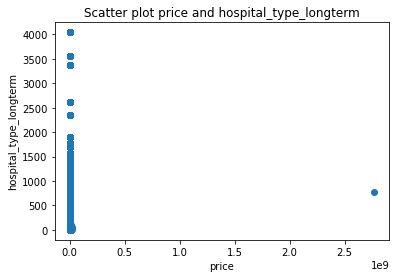

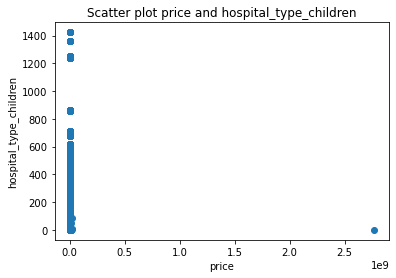

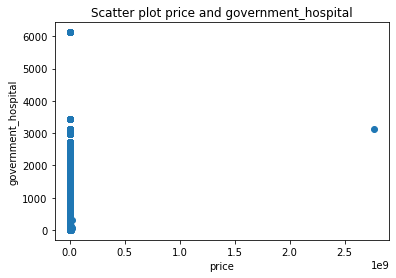

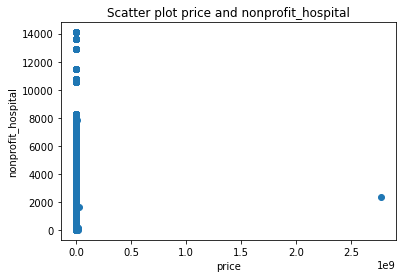

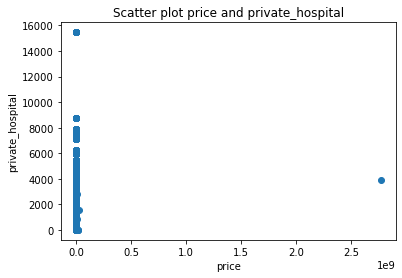

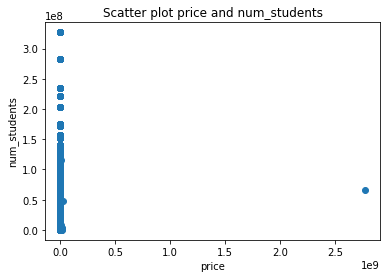

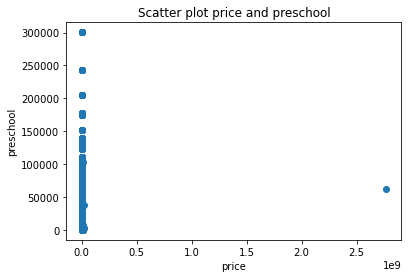

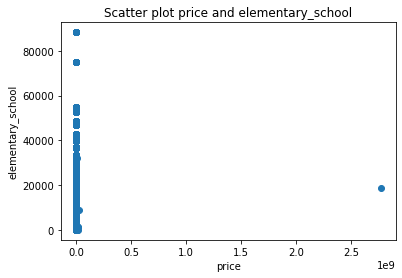

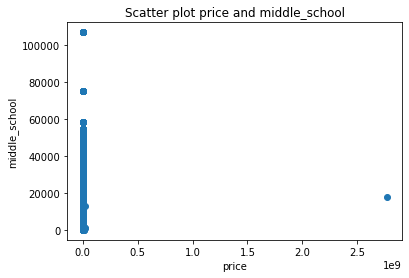

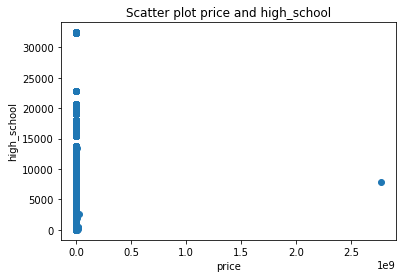

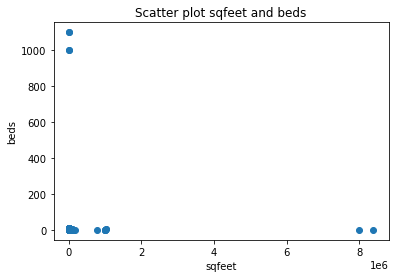

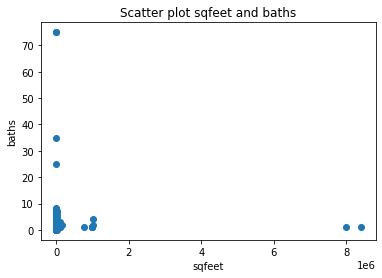

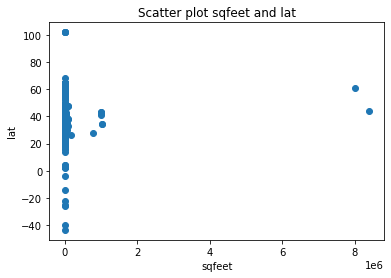

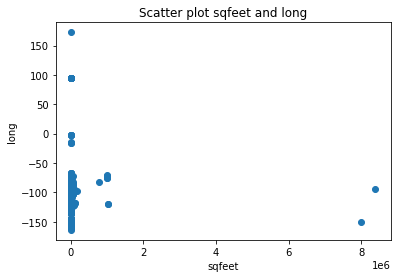

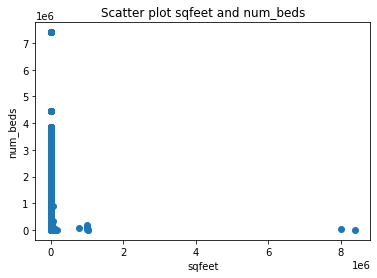

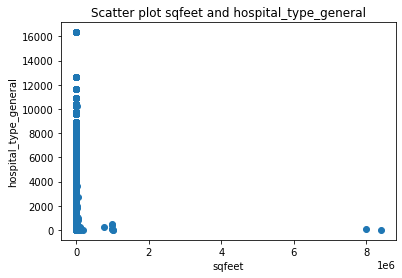

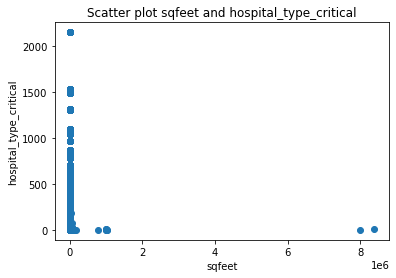

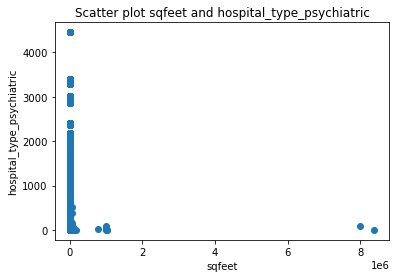

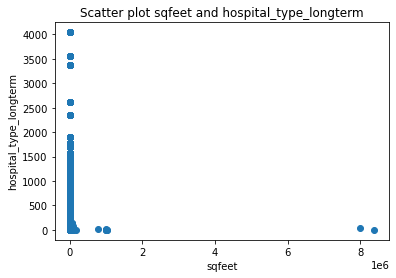

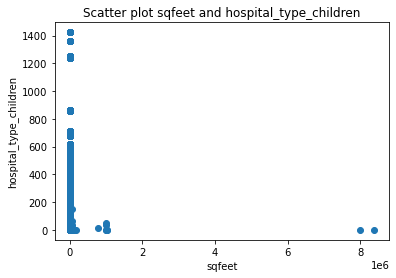

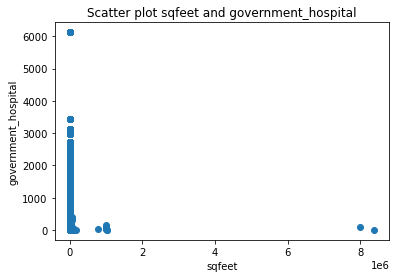

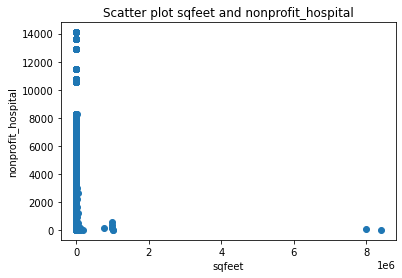

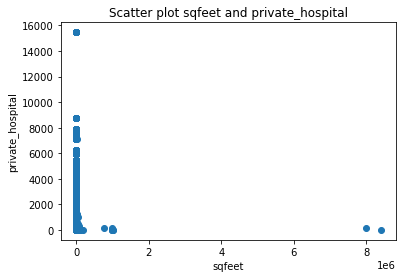

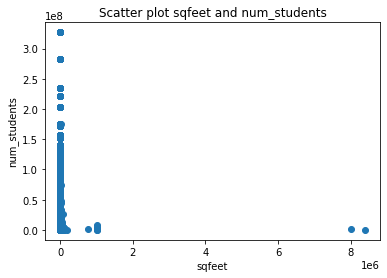

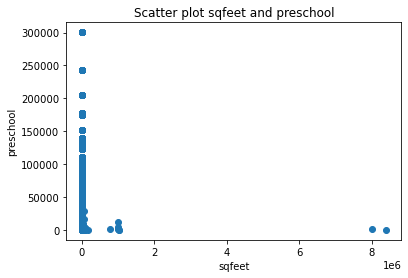

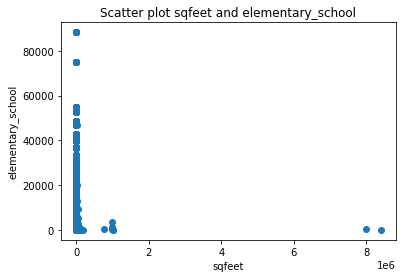

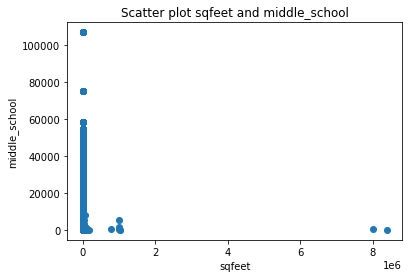

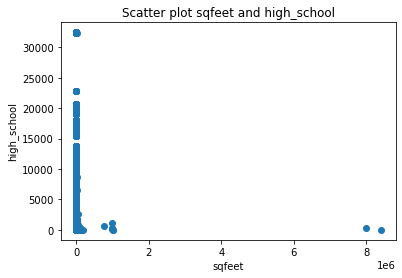

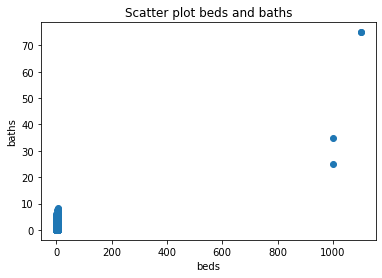

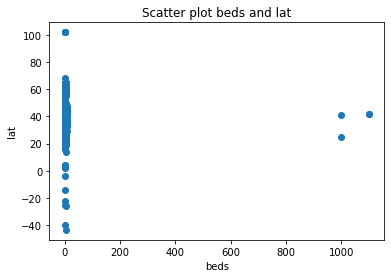

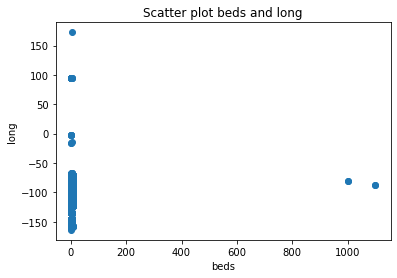

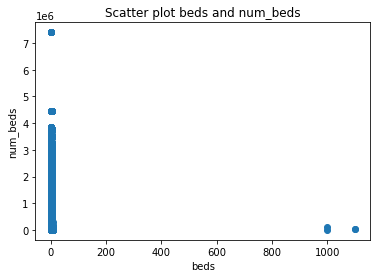

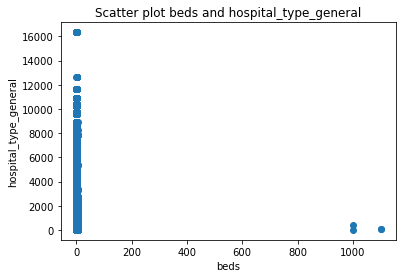

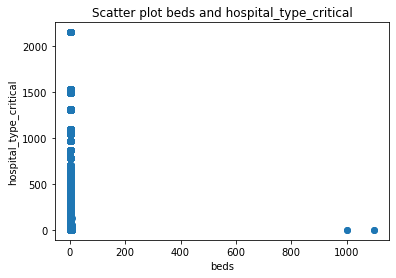

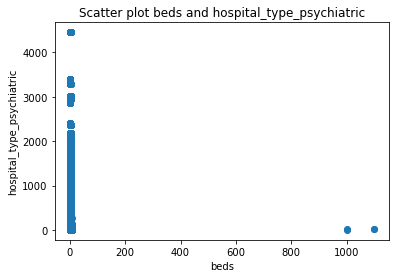

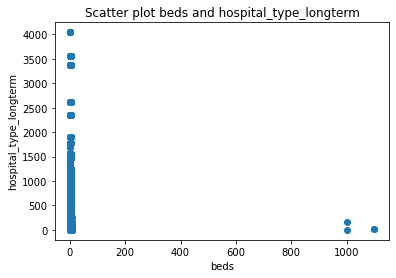

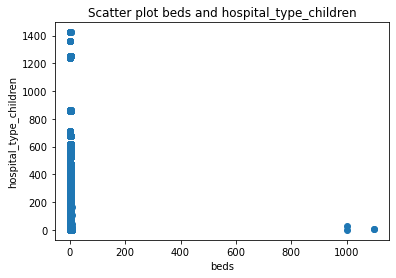

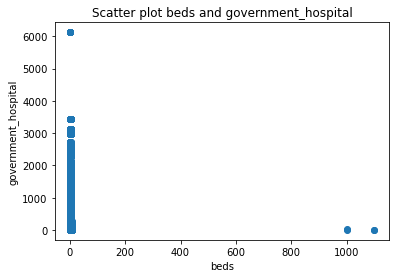

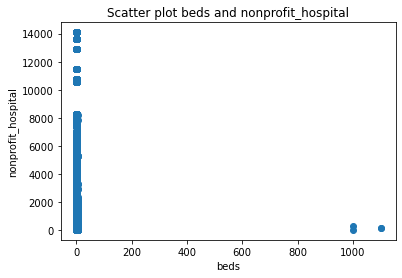

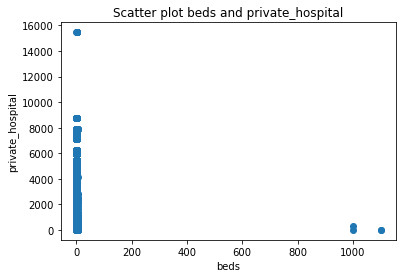

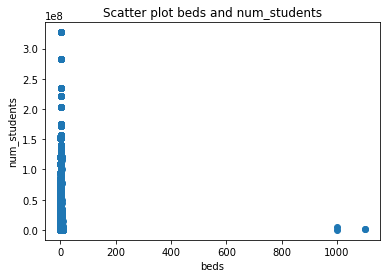

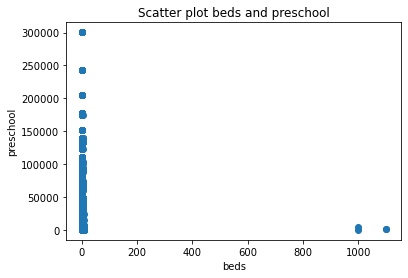

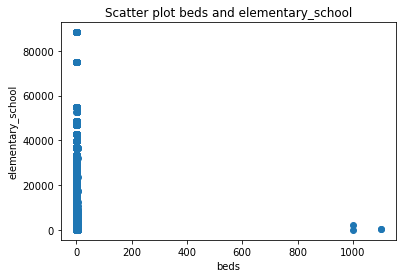

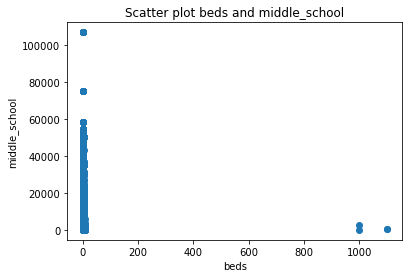

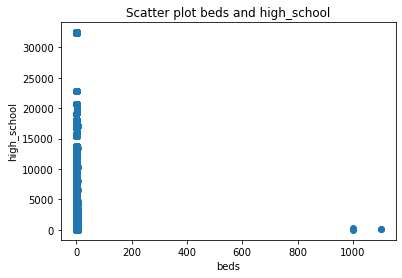

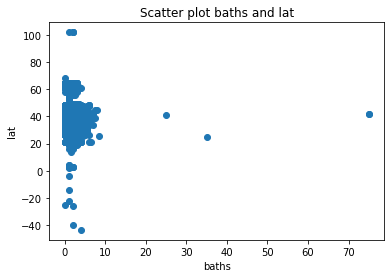

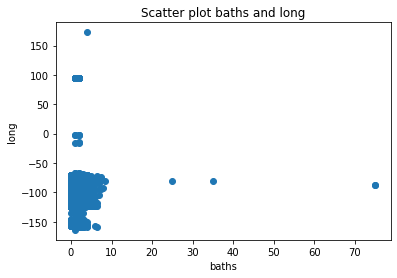

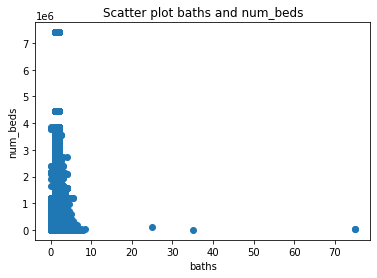

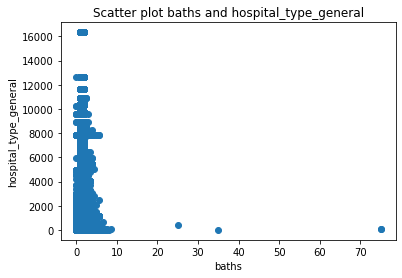

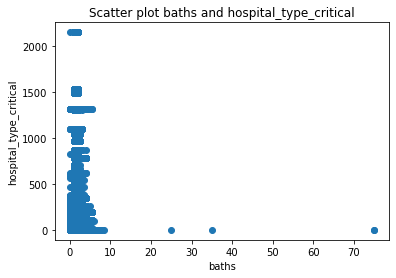

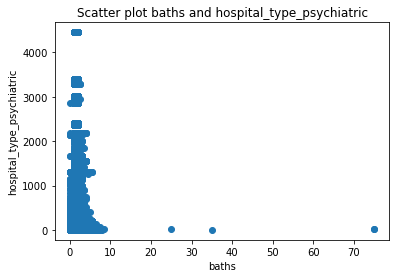

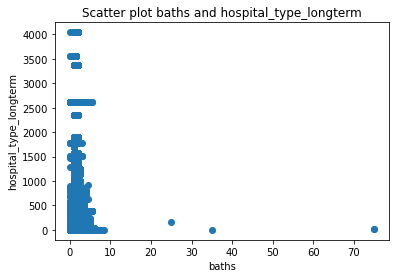

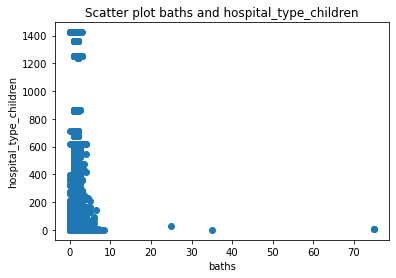

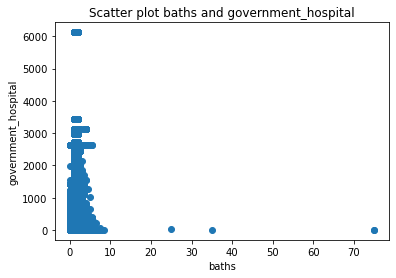

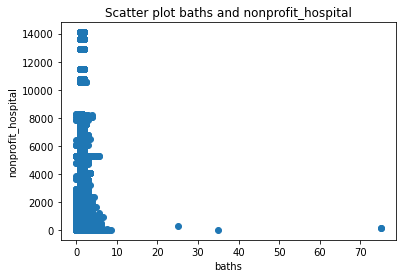

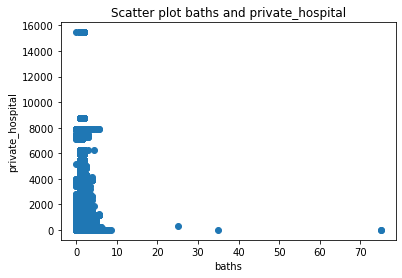

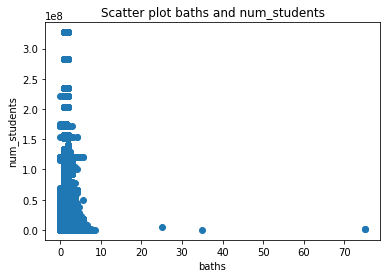

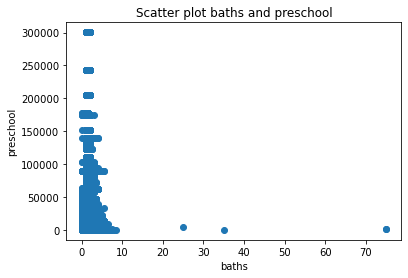

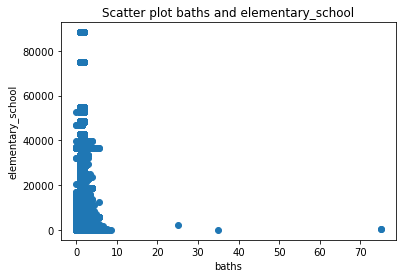

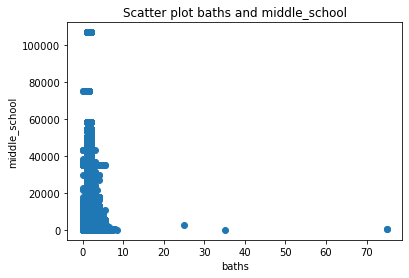

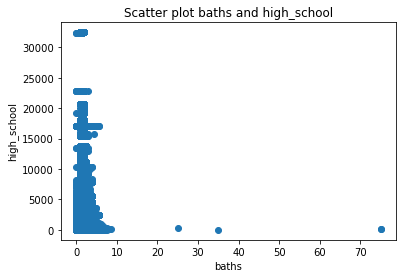

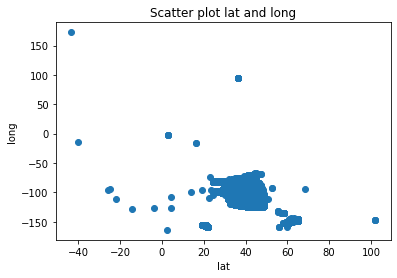

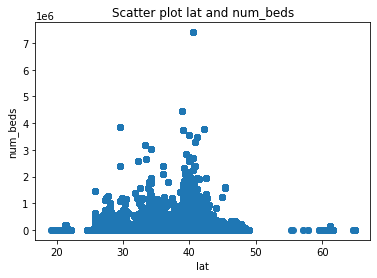

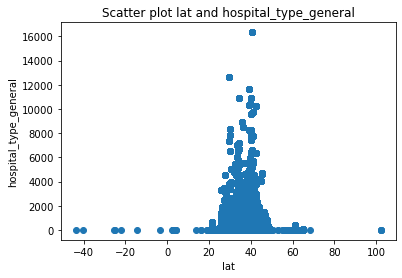

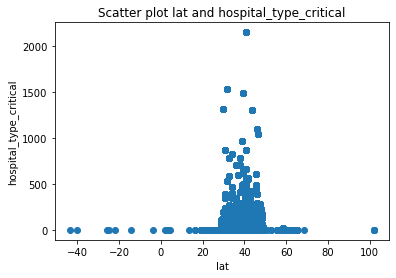

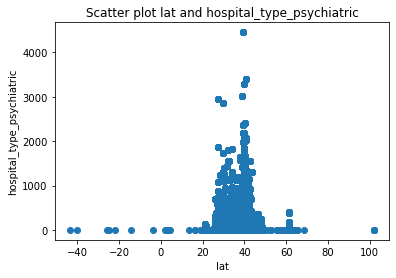

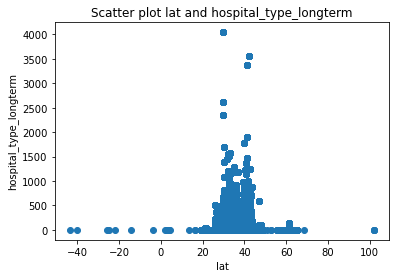

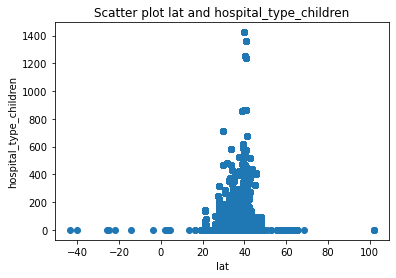

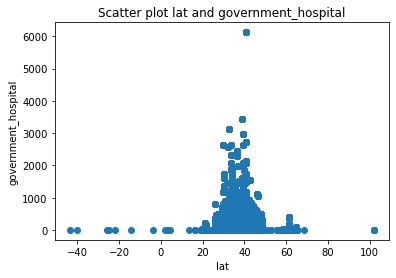

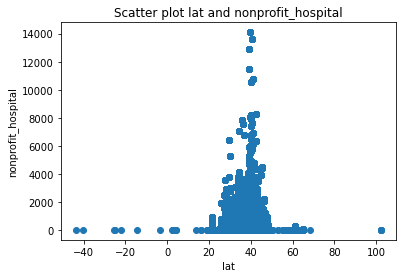

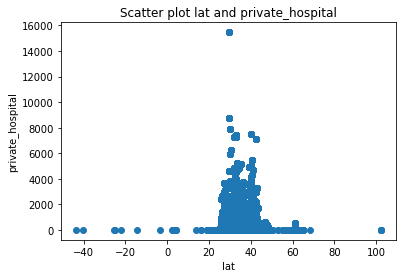

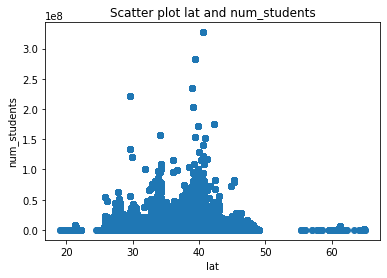

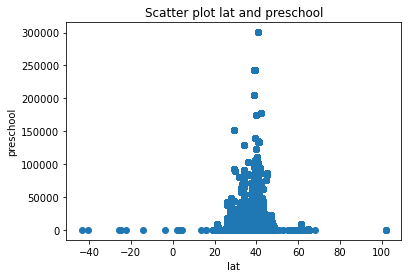

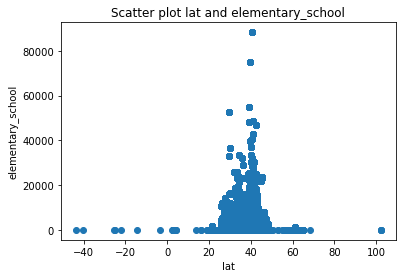

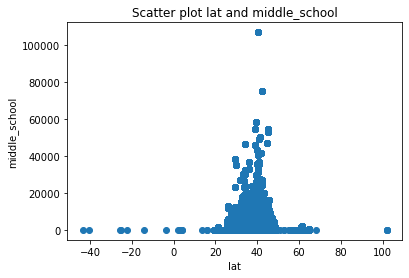

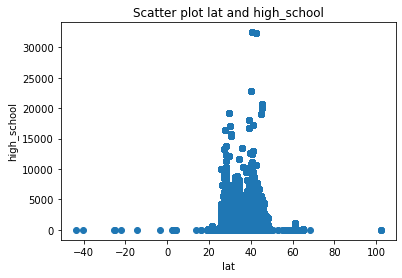

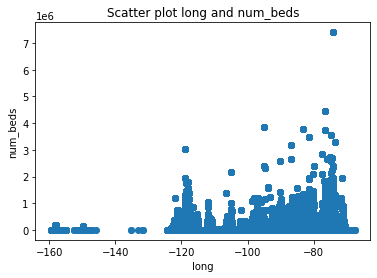

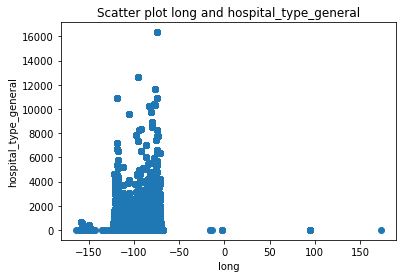

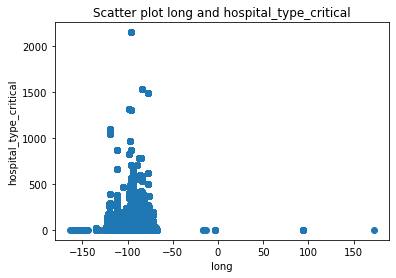

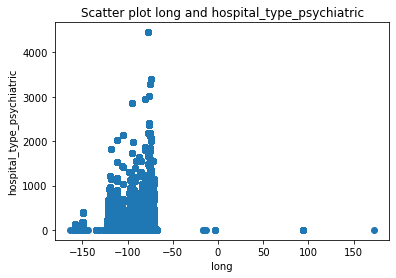

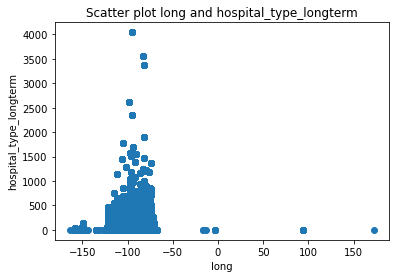

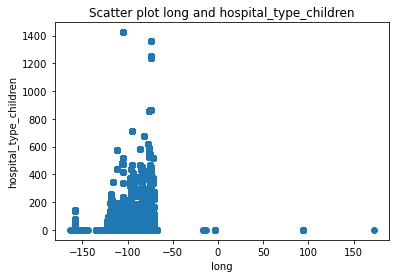

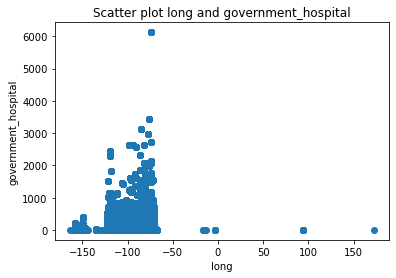

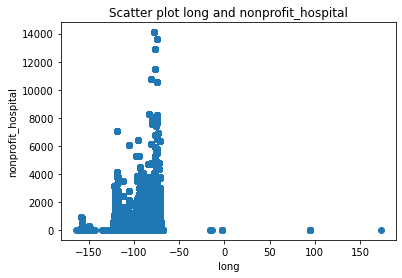

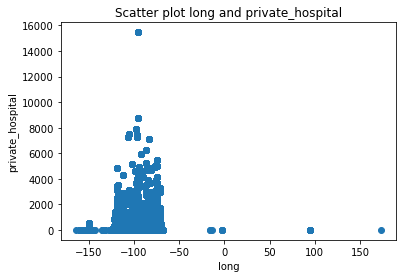

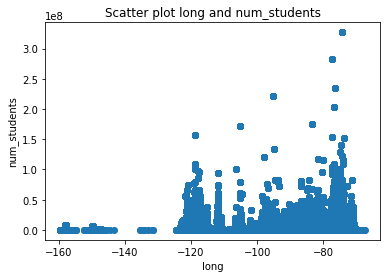

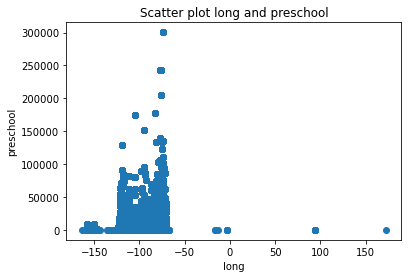

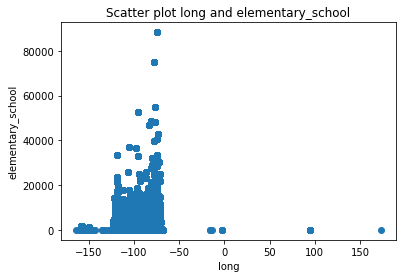

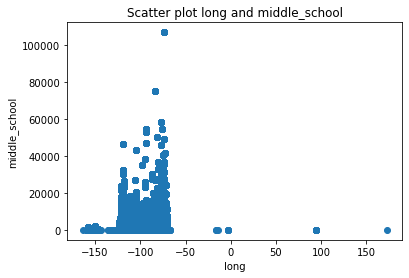

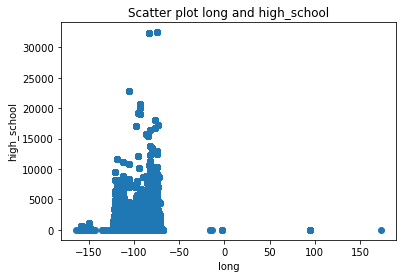

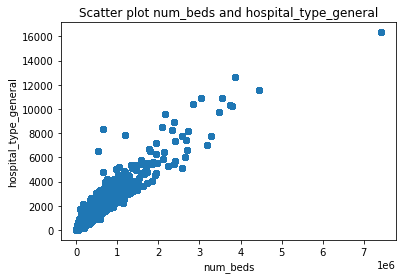

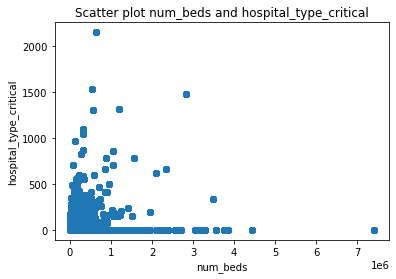

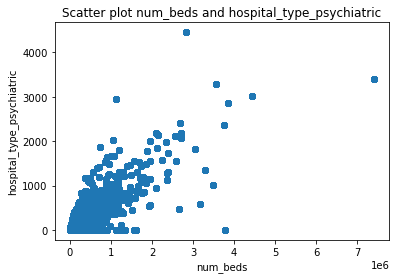

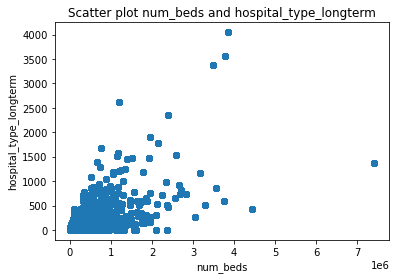

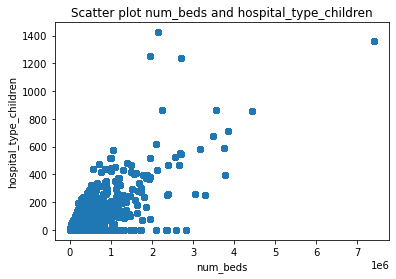

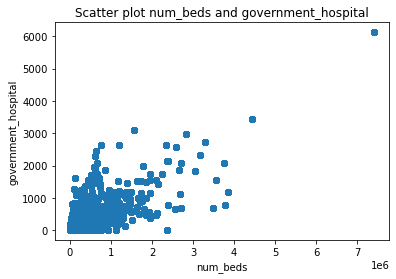

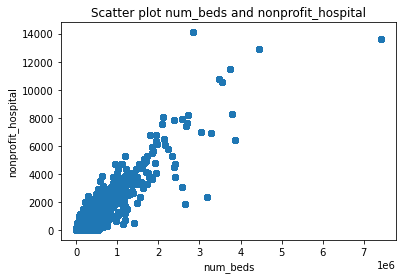

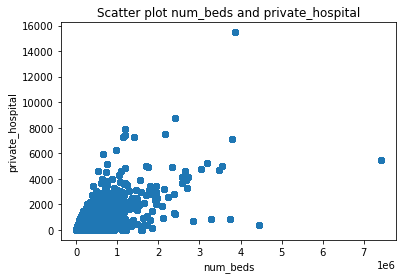

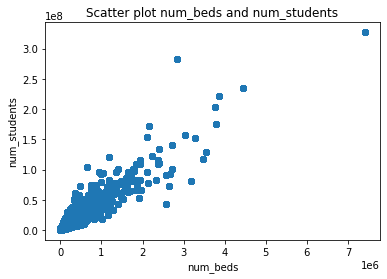

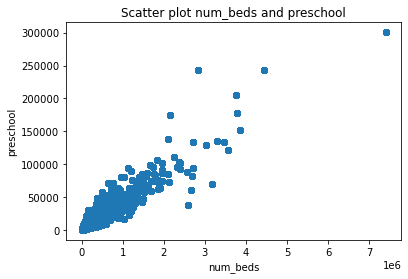

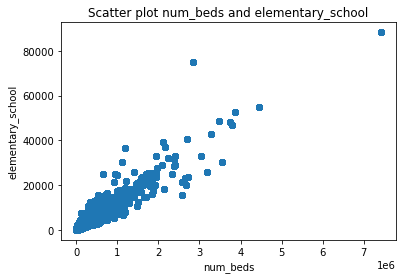

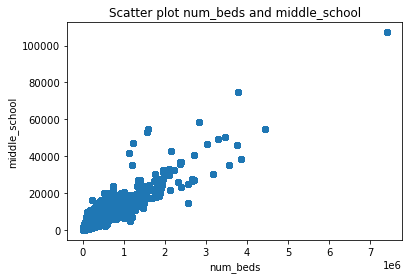

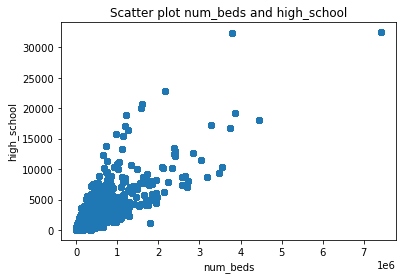

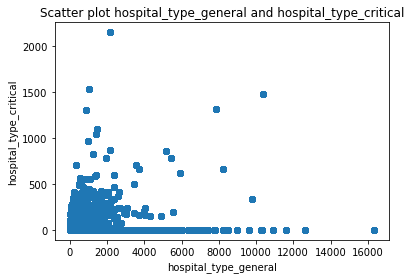

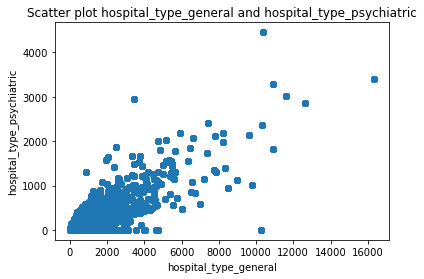

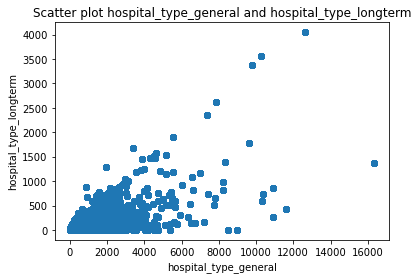

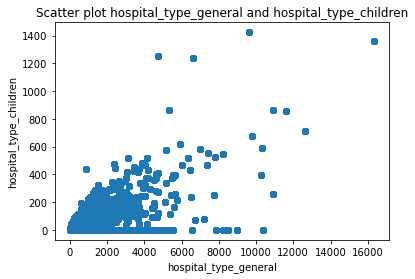

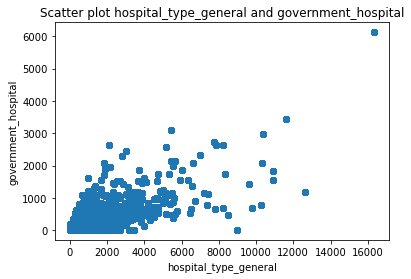

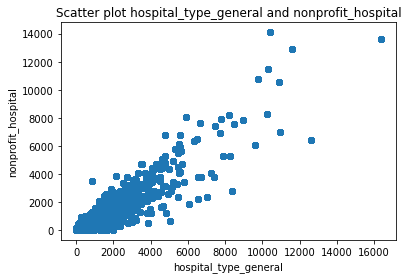

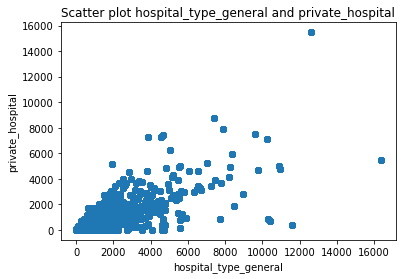

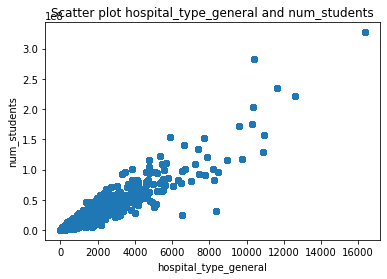

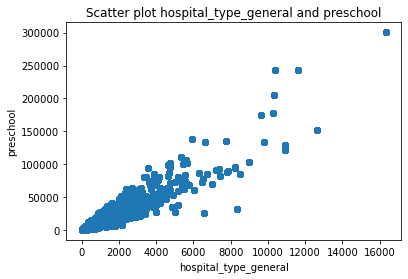

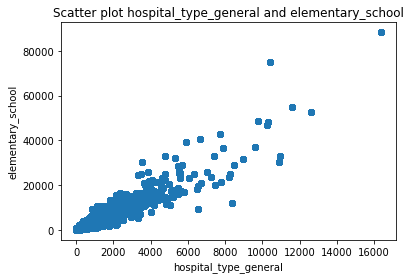

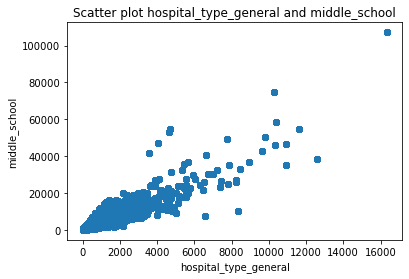

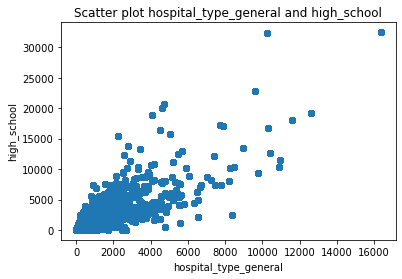

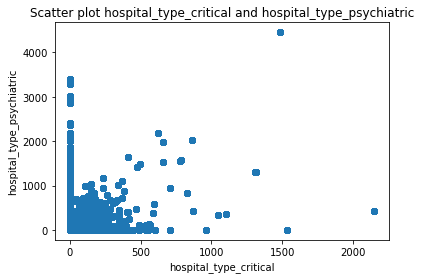

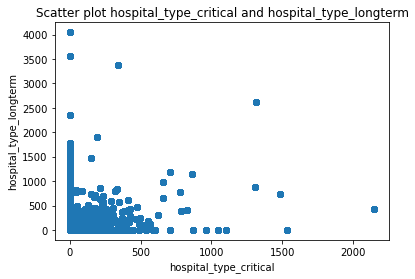

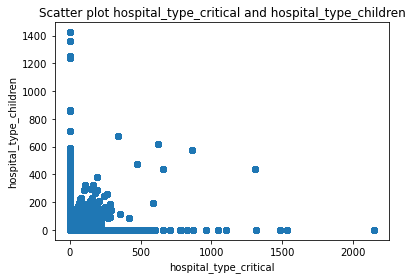

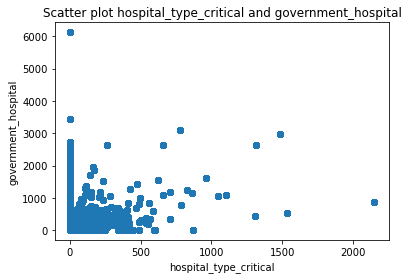

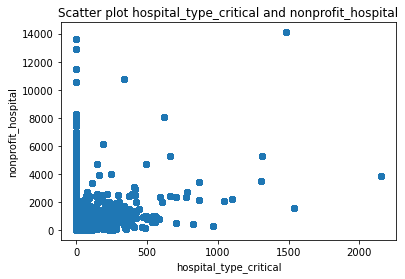

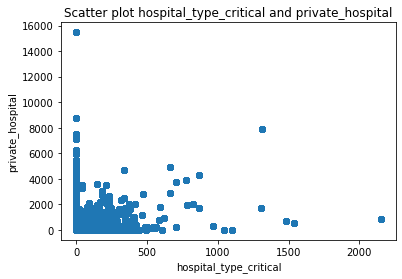

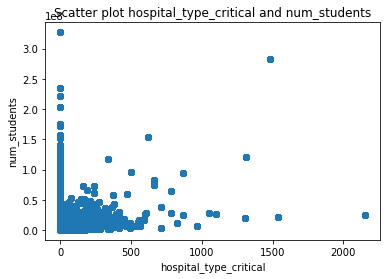

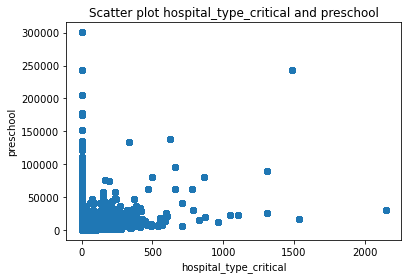

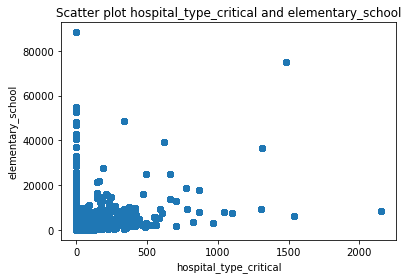

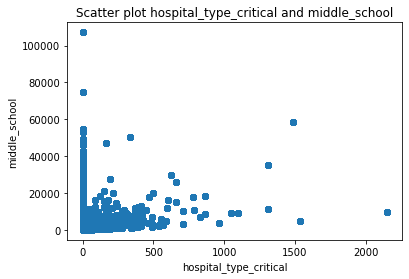

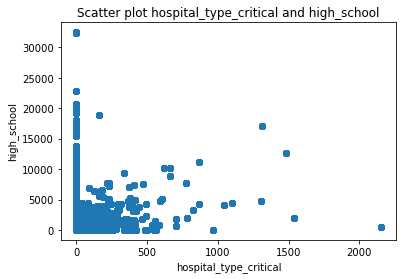

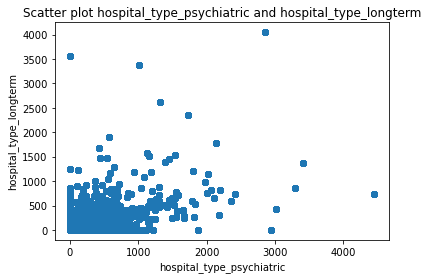

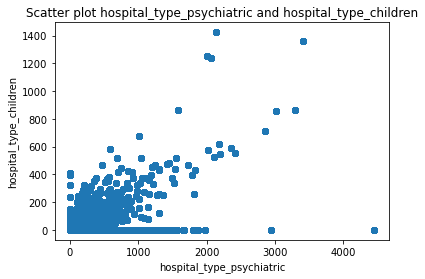

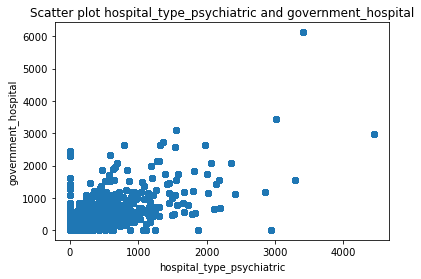

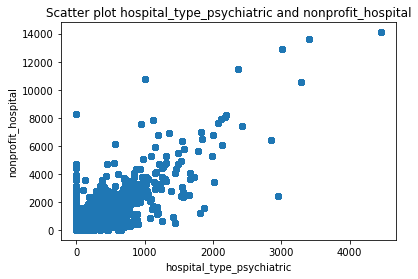

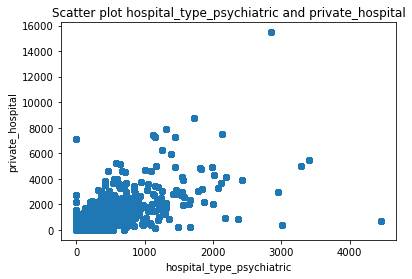

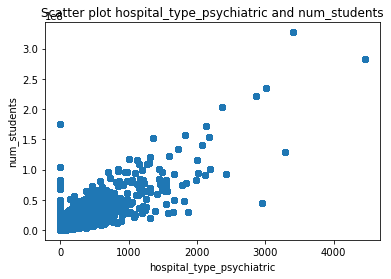

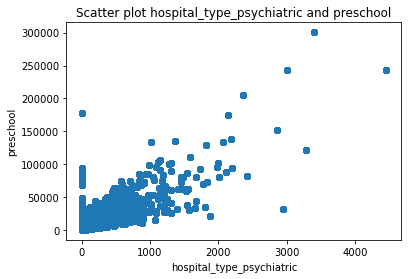

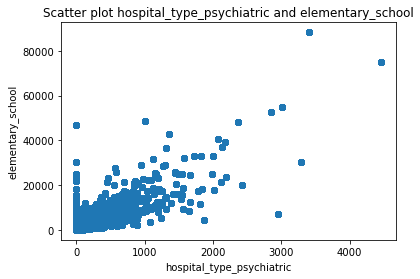

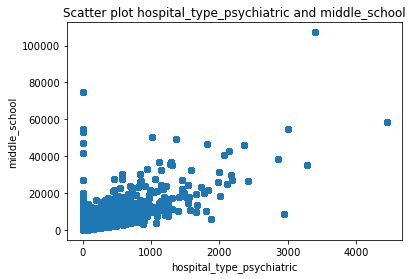

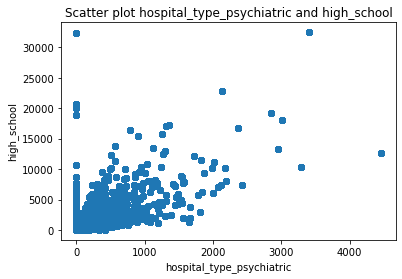

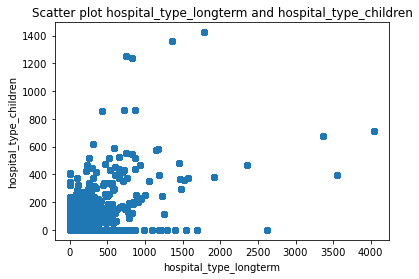

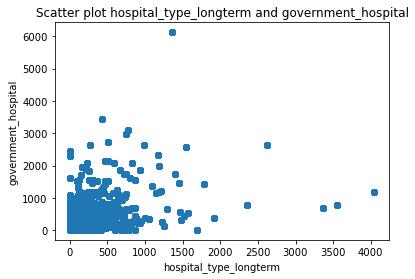

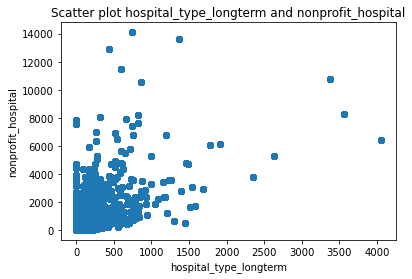

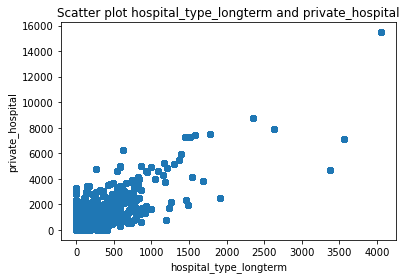

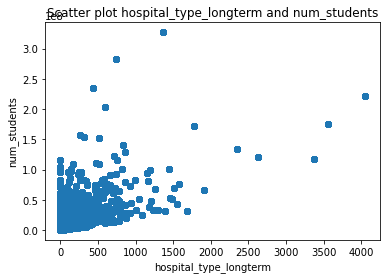

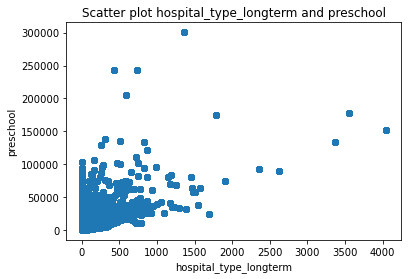

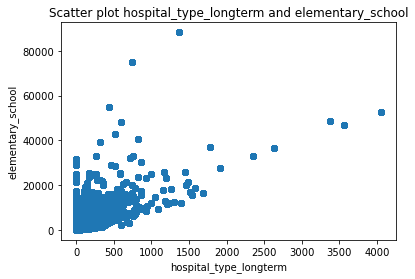

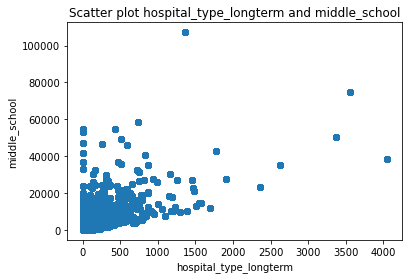

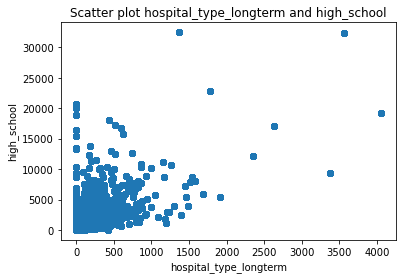

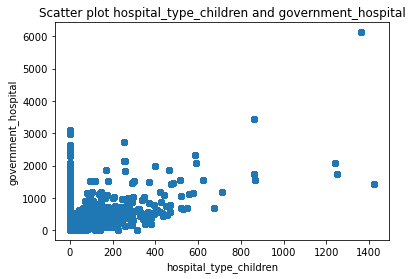

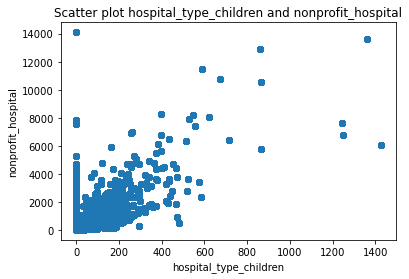

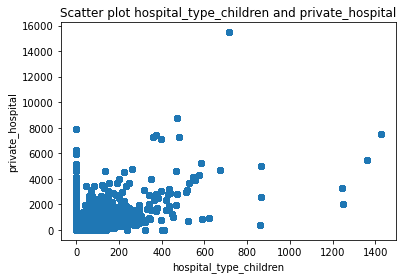

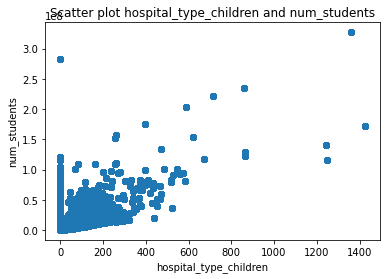

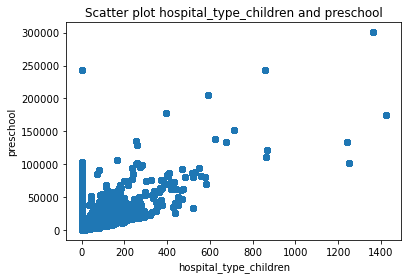

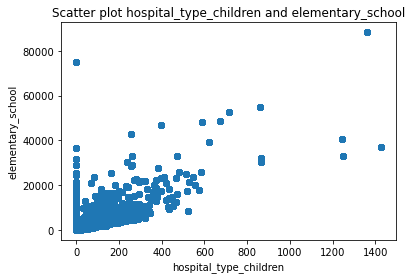

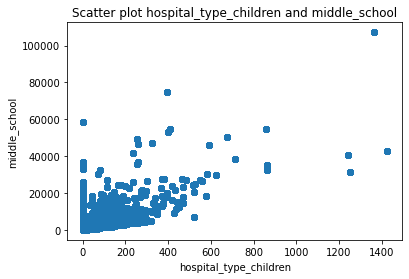

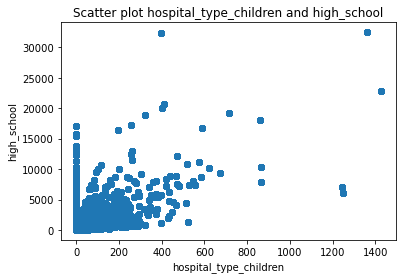

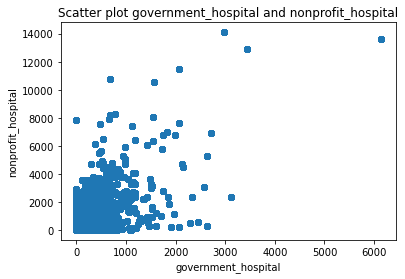

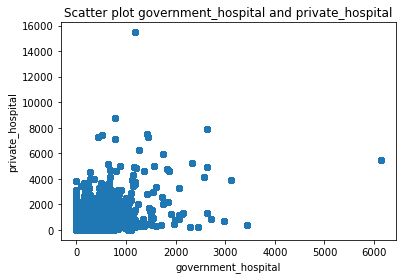

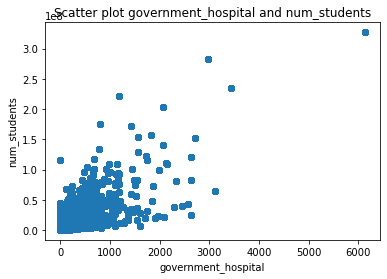

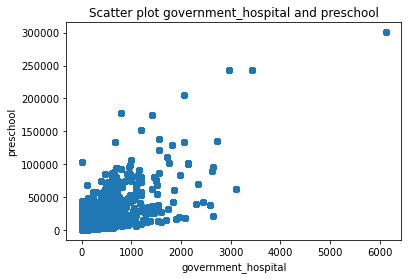

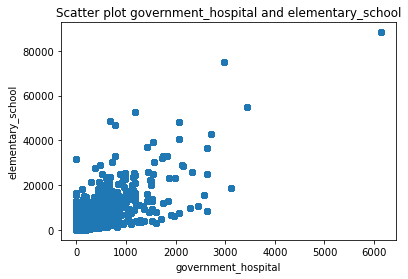

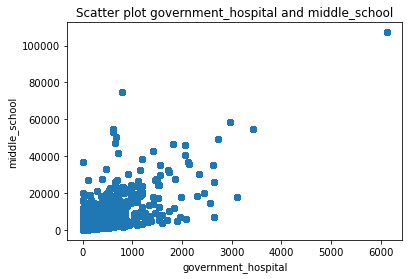

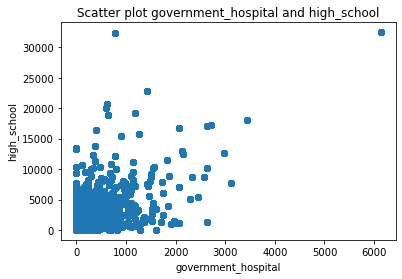

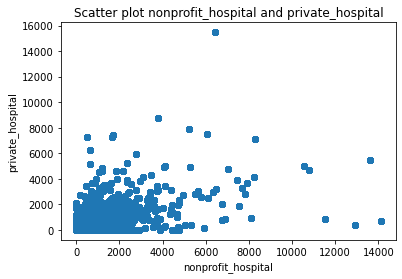

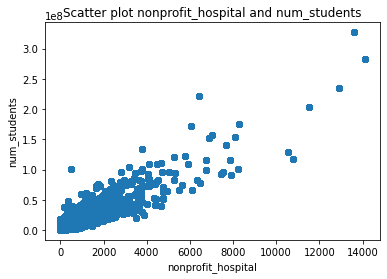

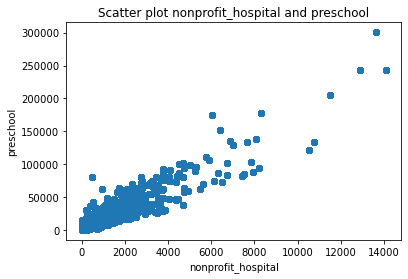

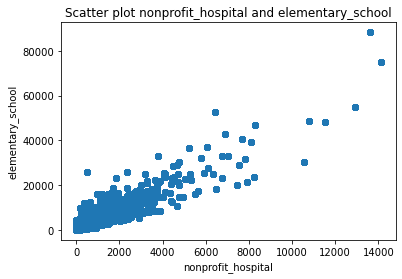

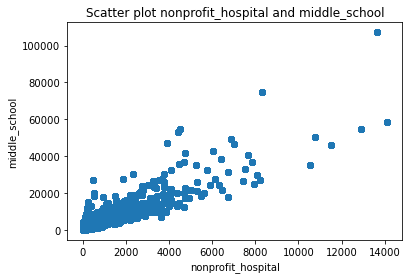

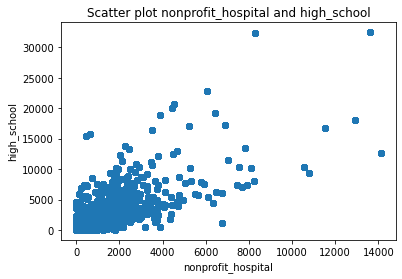

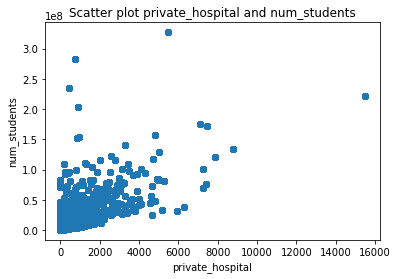

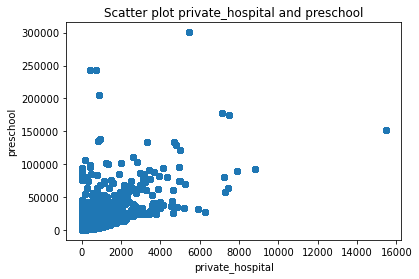

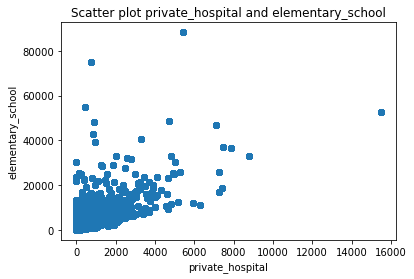

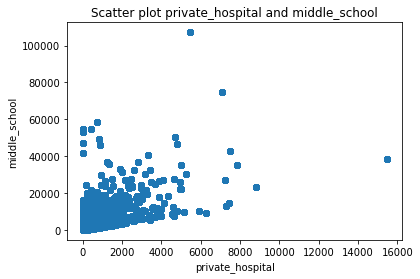

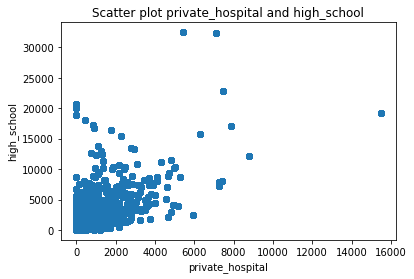

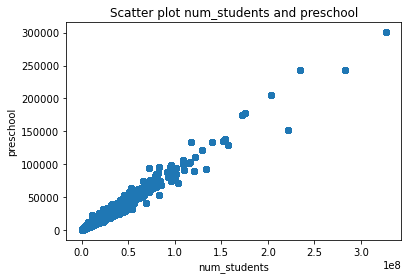

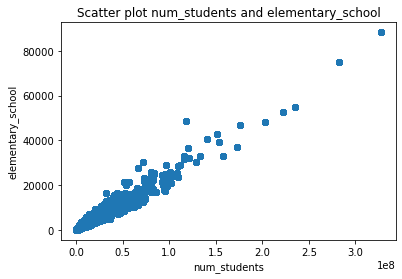

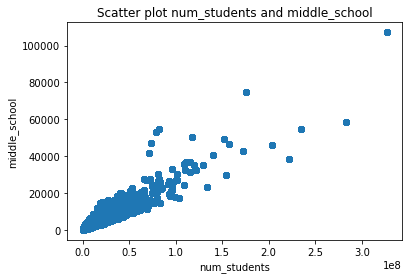

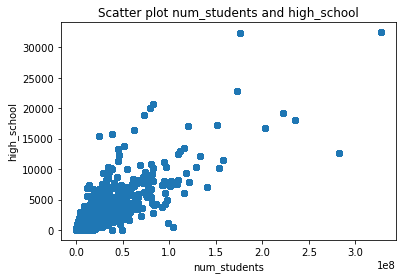

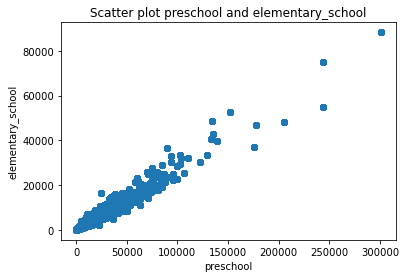

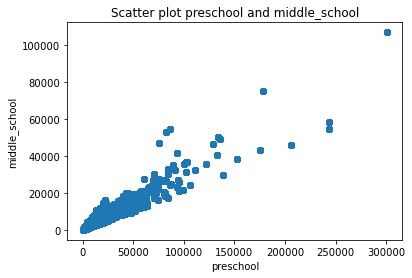

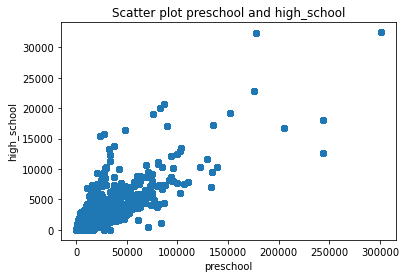

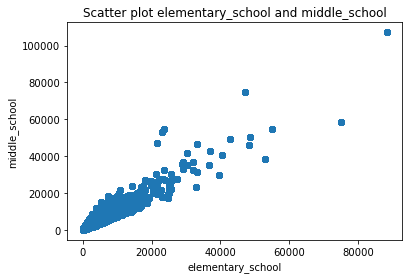

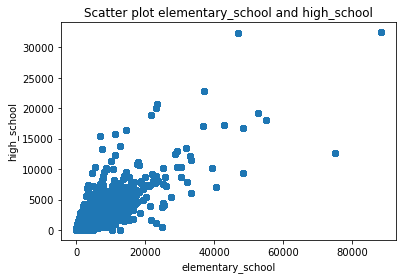

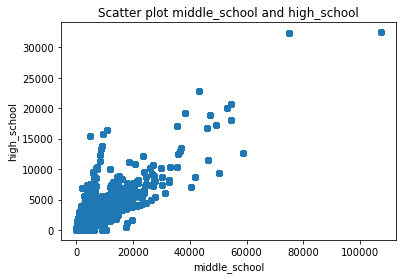

In [10]:
scatter(df)

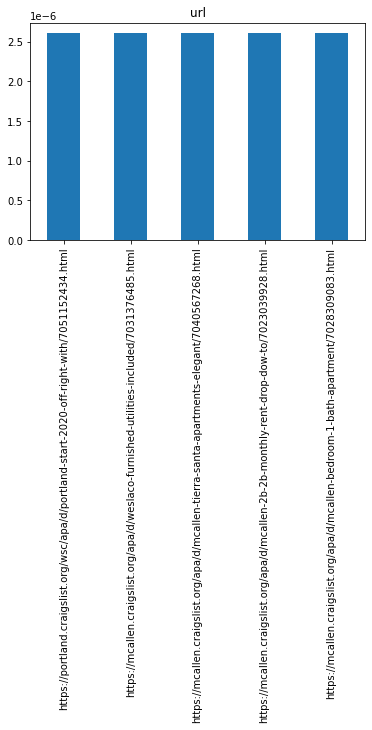

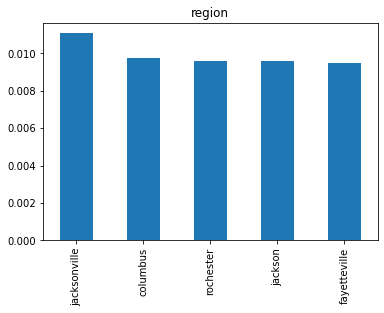

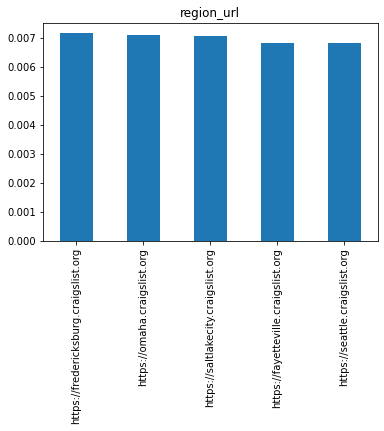

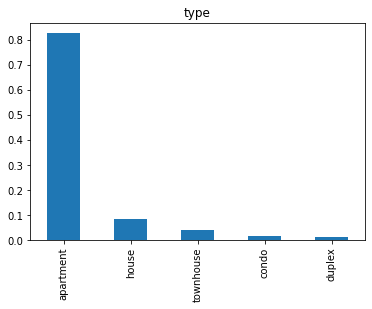

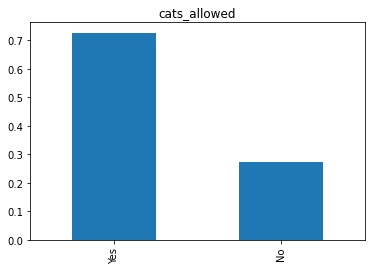

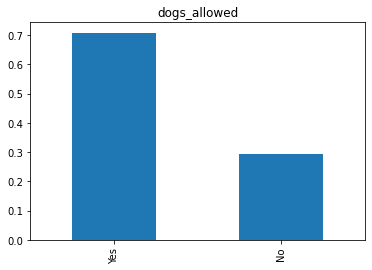

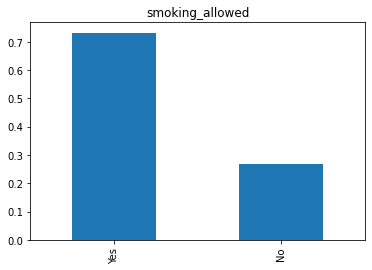

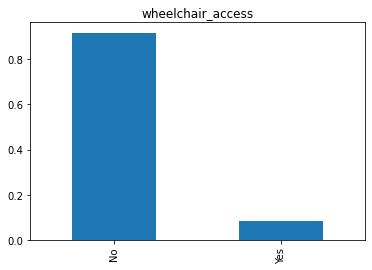

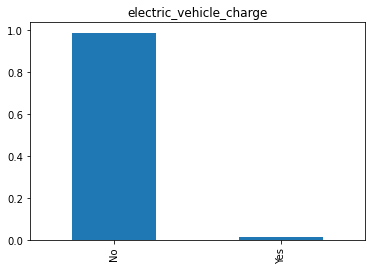

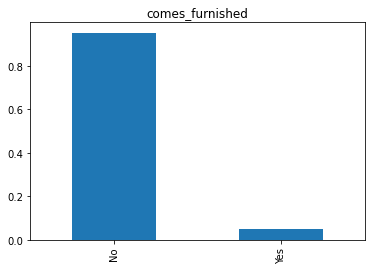

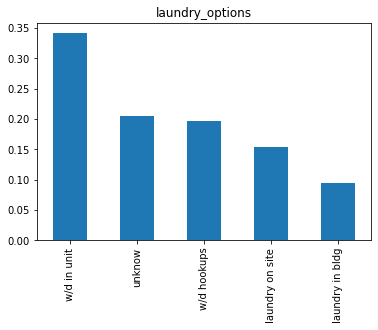

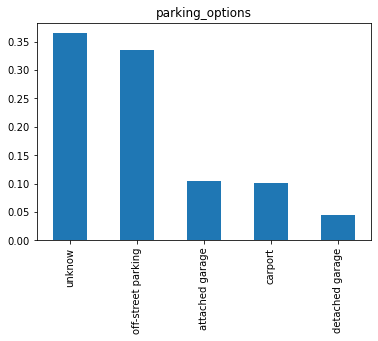

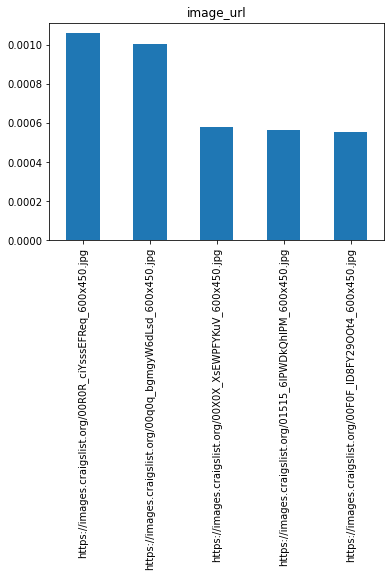

Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.


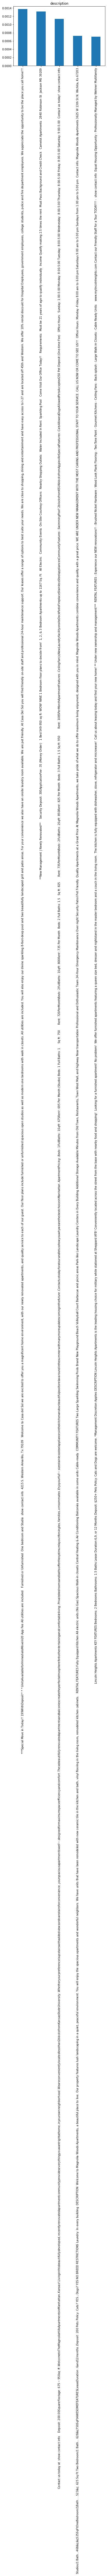

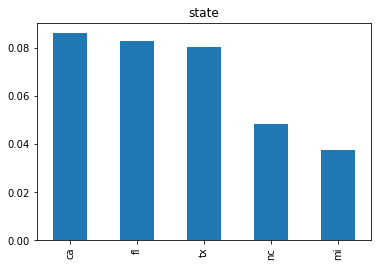

In [11]:
barplot(df,top=5,freq=True)